In [1]:
import pandas as pd

df = pd.read_csv('/content/Housing.csv')
display(df.head())

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Load the dataset
df = pd.read_csv('/content/Housing.csv')

# Display the first few rows of the dataframe
print(df.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [4]:
# List of columns to map from 'yes'/'no' to 1/0
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Apply the mapping
df[binary_cols] = df[binary_cols].apply(lambda x: x.map({'yes': 1, 'no': 0}))

# Use get_dummies for one-hot encoding of 'furnishingstatus'
status = pd.get_dummies(df['furnishingstatus'], drop_first=True)
df = pd.concat([df, status], axis=1)
df.drop(['furnishingstatus'], axis=1, inplace=True)

# Display the first few rows after preprocessing
print(df.head())

      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

   semi-furnished  unfurnished  
0           False        False  
1           False        False  
2            True        False  
3           False        F

In [6]:
# Simple Linear Regression
X_simple = df[['area']]
y_simple = df['price']

# Split data into training and testing sets
X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(X_simple, y_simple, test_size=0.3, random_state=101)

In [8]:
# Create and train the model
lr_simple = LinearRegression()
lr_simple.fit(X_train_simple, y_train_simple)

# Make predictions
predictions_simple = lr_simple.predict(X_test_simple)

In [9]:
# Evaluate the model
print('Simple Linear Regression Metrics:')
print('MAE:', metrics.mean_absolute_error(y_test_simple, predictions_simple))
print('MSE:', metrics.mean_squared_error(y_test_simple, predictions_simple))
print('R2 Score:', metrics.r2_score(y_test_simple, predictions_simple))

Simple Linear Regression Metrics:
MAE: 1148319.8223711844
MSE: 2467387924628.8105
R2 Score: 0.24385496968014964


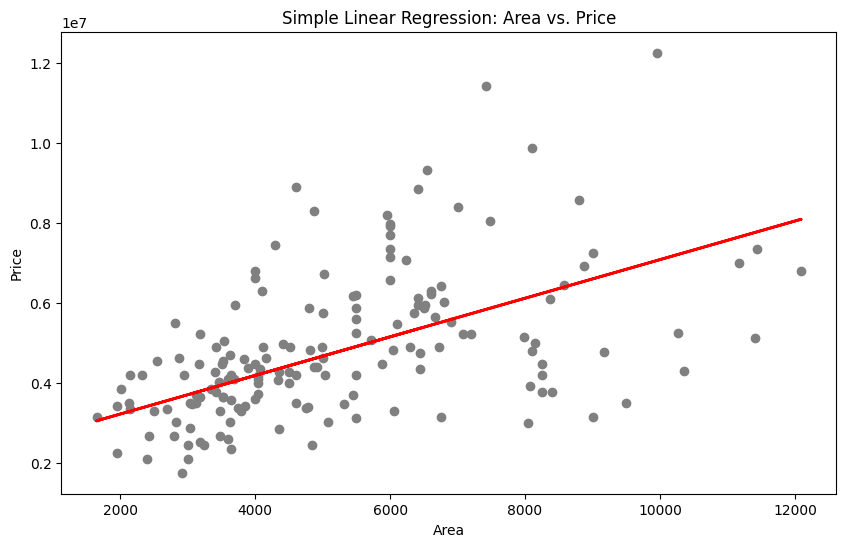

In [10]:
# Plotting the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_test_simple, y_test_simple, color='gray')
plt.plot(X_test_simple, predictions_simple, color='red', linewidth=2)
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Simple Linear Regression: Area vs. Price')
plt.show()

In [12]:
# Multiple Linear Regression
X_multi = df.drop('price', axis=1)
y_multi = df['price']

# Split data
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi, test_size=0.3, random_state=101)

In [13]:
# Create and train the model
lr_multi = LinearRegression()
lr_multi.fit(X_train_multi, y_train_multi)

# Make predictions
predictions_multi = lr_multi.predict(X_test_multi)

In [14]:
# Evaluate the model
print('Multiple Linear Regression Metrics:')
print('MAE:', metrics.mean_absolute_error(y_test_multi, predictions_multi))
print('MSE:', metrics.mean_squared_error(y_test_multi, predictions_multi))
print('R2 Score:', metrics.r2_score(y_test_multi, predictions_multi))

Multiple Linear Regression Metrics:
MAE: 817762.9532006815
MSE: 1264406165048.4868
R2 Score: 0.6125155560404941


In [15]:
# Interpret the coefficients
coeff_df = pd.DataFrame(lr_multi.coef_, X_multi.columns, columns=['Coefficient'])
print(coeff_df)

                  Coefficient
area             2.658747e+02
bedrooms         9.863324e+04
bathrooms        9.549813e+05
stories          4.672404e+05
mainroad         4.203070e+05
guestroom        8.280785e+04
basement         4.094060e+05
hotwaterheating  1.002453e+06
airconditioning  8.371028e+05
parking          2.923275e+05
prefarea         7.105399e+05
semi-furnished   2.484153e+04
unfurnished     -4.392504e+05
